## **4.5.2**

Сопоставьте вид модулей и стоимость учёта зависимостей длины n. O(n) означает, что нужно порядка O(n) слоёв такого типа, чтобы иметь возможность связать слова, отстоящие друг от друга примерно на n позиций во входном тексте.

**Ответ**


* "Обычные" свёртки (dilation=1) -------- O(n/k), где k - размер ядра
* "Прореженные" свёртки (𝑑𝑖𝑙𝑎𝑡𝑖𝑜𝑛=2) ------  O(log(n))
*  Рекуррентные модули ------------------------------- O(n)

```
# This is formatted as code
```

     


**4.5.4**


---


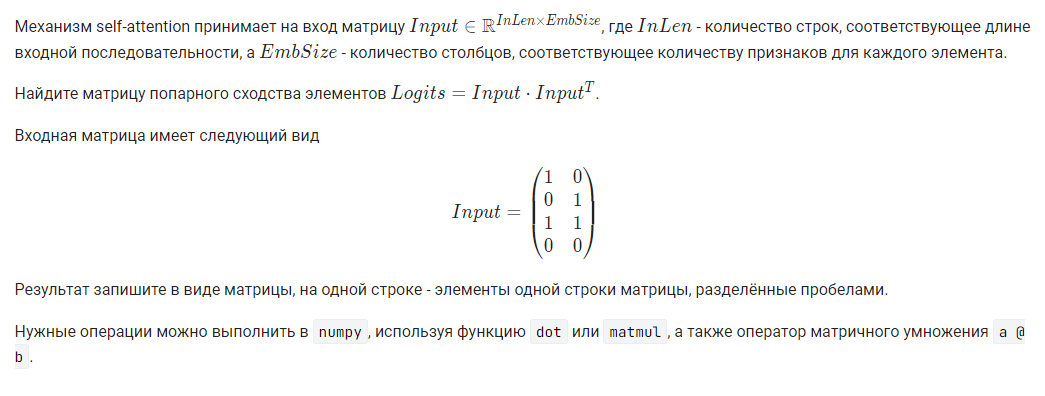**

In [ ]:
import numpy as np
x = np.array([[1,0],[0,1],[1,1],[0,0]])
res = x.dot(x.T)
res
for row in res:
    print(' '.join(map(lambda x: "{:.0f} ".format(x), row)))

1  0  1  0 
0  1  1  0 
1  1  2  0 
0  0  0  0 


**4.5.5**

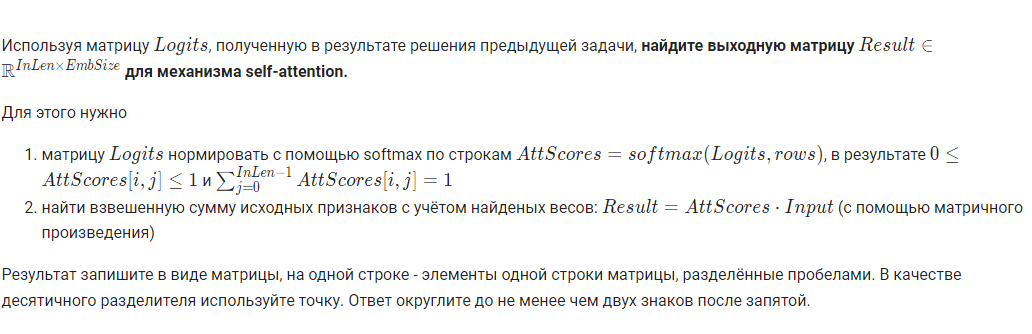

In [ ]:
import numpy as np
from scipy.special import softmax
inp = np.array([[1,0],[0,1],[1,1],[0,0]])
log = np.dot(inp,inp.T)
log=softmax(log , axis=1)
log = np.dot(log,inp)

for row in log:
    print(' '.join(map(lambda x: "{:.2f} ".format(x), row)))

0.73  0.50 
0.50  0.73 
0.73  0.73 
0.50  0.50 


**4.5.7**

**Solve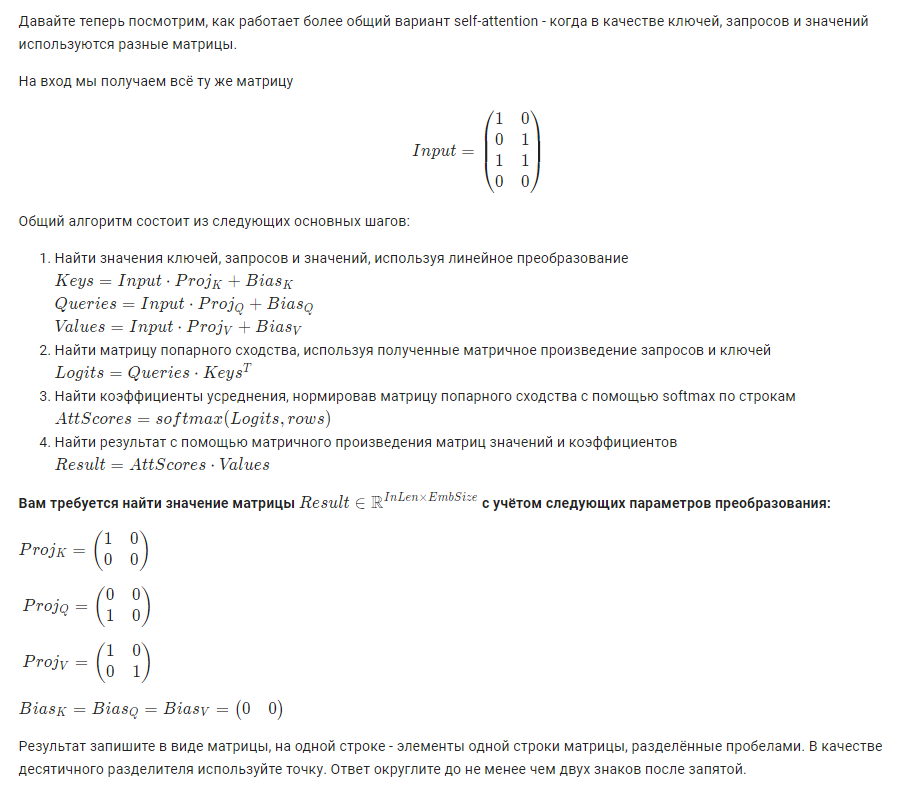**


In [ ]:
x = np.array([[1,0],[0,1],[1,1],[0,0]])

pk = np.array([[1,0],[0,0]])
pq = np.array([[0,0],[1,0]])
pv = np.array([[1,0],[0,1]])

K = x.dot(pk)
Q = x.dot(pq)
V = x.dot(pv)

A = Q.dot(K.T)
A = softmax(A, axis=1)
res = A.dot(V)

for row in res:
    print(' '.join(map(lambda x: "{:.2f} ".format(x), row)))

0.50  0.50 
0.73  0.50 
0.73  0.50 
0.50  0.50 


### **4.5.9**


---



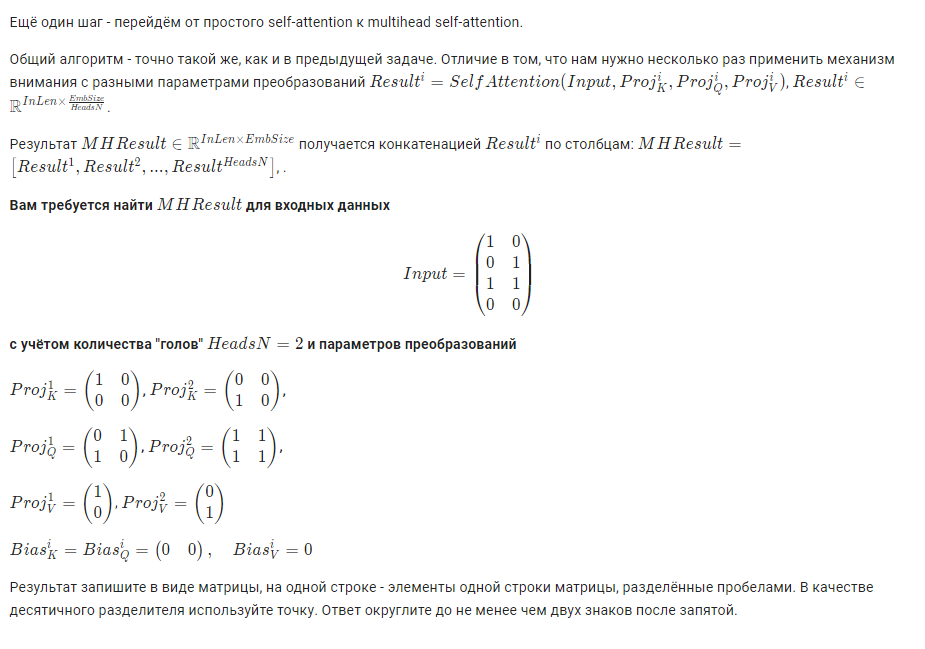

In [ ]:
def attention(x,pk,pq,pv):
  K = x.dot(pk)
  Q = x.dot(pq)
  V = x.dot(pv)

  A = Q.dot(K.T)
  A = softmax(A, axis=1)
  return A.dot(V)

x = np.array([[1,0],[0,1],[1,1],[0,0]])

pk = np.array([[1,0],[0,0]])
pq = np.array([[0,0],[1,0]])
pv = np.array([1,0])

a1 = attention(x,pk,pq,pv)

pk = np.array([[0,0],[1,0]])
pq = np.array([[1,1],[1,1]])
pv = np.array([0,1])

a2 = attention(x,pk,pq,pv)


res = np.concatenate([a1,a2]).reshape((2,4)).T
for row in res:
    print(' '.join(map(lambda x: "{:.2f} ".format(x), row)))
#a1 + a2

0.50  0.73 
0.73  0.73 
0.73  0.88 
0.50  0.50 


In [ ]:
# @title Default title text
Максимальная длина зависимостей, учитываемых одним слоем self-attention, растёт пропорционально размерности признакового пространства

В рамках одного слоя self-attention все элементы последовательности можно обрабатывать параллельно

Transformer - это несколько слоёв self-attention вместе с нелинейными преобразованиями между ними

Зависимости большой длины учитываются за 1 слой self-attention